In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import re
from importlib import reload
import warnings
from pprint import pprint
import string
import pyLDAvis.gensim as gensimvis
import pickle 
import pyLDAvis
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [2]:
STOPWORDS.update(["a","el","del","lo", "abord", "absolument", "afin", "ah", "ai", "aie", "aient", "aies", "ailleurs", "ainsi", "ait", "allaient", "allo",
 "allons", "allô", "alors", "anterieur", "anterieure", "anterieures", "apres", "après", "as", "assez", "attendu", "au",
 "aucun", "aucune", "aucuns", "aujourd", "aujourd'hui", "aupres", "auquel", "aura", "aurai", "auraient", "aurais",
 "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autant", "autre", "autrefois",
 "autrement", "autres", "autrui", "aux", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez",
 "aviez", "avions", "avoir", "avons", "ayant", "ayez", "ayons", "b", "bah", "bas", "basee", "bat", "beau", "beaucoup",
 "bien", "bigre", "bon", "boum", "bravo", "brrr", "c", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là",
 "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cependant", "certain",
 "certaine", "certaines", "certains", "certes", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "chacun",
 "chacune", "chaque", "cher", "chers", "chez", "chiche", "chut", "chère", "chères", "ci", "cinq", "cinquantaine",
 "cinquante", "cinquantième", "cinquième", "clac", "clic", "combien", "comme", "comment", "comparable", "comparables",
 "compris", "concernant", "contre", "couic", "crac", "d", "da", "dans", "de", "debout", "dedans", "dehors", "deja",
 "delà", "depuis", "dernier", "derniere", "derriere", "derrière", "des", "desormais", "desquelles", "desquels",
 "dessous", "dessus", "deux", "deuxième", "deuxièmement", "devant", "devers", "devra", "devrait", "different",
 "differentes", "differents", "différent", "différente", "différentes", "différents", "dire", "directe", "directement",
 "dit", "dite", "dits", "divers", "diverse", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dixième", "doit",
 "doivent", "donc", "dont", "dos", "douze", "douzième", "dring", "droite", "du", "duquel", "durant", "dès", "début",
 "désormais", "e", "effet", "egale", "egalement", "egales", "eh", "elle", "elle-même", "elles", "elles-mêmes", "en",
 "encore", "enfin", "entre", "envers", "environ", "es", "essai", "est", "et", "etant", "etc", "etre", "eu", "eue",
 "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "eux-mêmes",
 "exactement", "excepté", "extenso", "exterieur", "eûmes", "eût", "eûtes", "f", "fais", "faisaient", "faisant", "fait",
 "faites", "façon", "feront", "fi", "flac", "floc", "fois", "font", "force", "furent", "fus", "fusse", "fussent",
 "fusses", "fussiez", "fussions", "fut", "fûmes", "fût", "fûtes", "g", "gens", "h", "ha", "haut", "hein", "hem", "hep",
 "hi", "ho", "holà", "hop", "hormis", "hors", "hou", "houp", "hue", "hui", "huit", "huitième", "hum", "hurrah", "hé",
 "hélas", "i", "ici", "il", "ils", "importe", "j", "je", "jusqu", "jusque", "juste", "k", "l", "la", "laisser",
 "laquelle", "las", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "longtemps", "lors", "lorsque",
 "lui", "lui-meme", "lui-même", "là", "lès", "m", "ma", "maint", "maintenant", "mais", "malgre", "malgré", "maximale",
 "me", "meme", "memes", "merci", "mes", "mien", "mienne", "miennes", "miens", "mille", "mince", "mine", "minimale",
 "moi", "moi-meme", "moi-même", "moindres", "moins", "mon", "mot", "moyennant", "multiple", "multiples", "même",
 "mêmes", "n", "na", "naturel", "naturelle", "naturelles", "ne", "neanmoins", "necessaire", "necessairement", "neuf",
 "neuvième", "ni", "nombreuses", "nombreux", "nommés", "non", "nos", "notamment", "notre", "nous", "nous-mêmes",
 "nouveau", "nouveaux", "nul", "néanmoins", "nôtre", "nôtres", "o", "oh", "ohé", "ollé", "olé", "on", "ont", "onze",
 "onzième", "ore", "ou", "ouf", "ouias", "oust", "ouste", "outre", "ouvert", "ouverte", "ouverts", "o|", "où", "p",
 "paf", "pan", "par", "parce", "parfois", "parle", "parlent", "parler", "parmi", "parole", "parseme", "partant",
 "particulier", "particulière", "particulièrement", "pas", "passé", "pendant", "pense", "permet", "personne",
 "personnes", "peu", "peut", "peuvent", "peux", "pff", "pfft", "pfut", "pif", "pire", "pièce", "plein", "plouf",
 "plupart", "plus", "plusieurs", "plutôt", "possessif", "possessifs", "possible", "possibles", "pouah", "pour",
 "pourquoi", "pourrais", "pourrait", "pouvait", "prealable", "precisement", "premier", "première", "premièrement",
 "pres", "probable", "probante", "procedant", "proche", "près", "psitt", "pu", "puis", "puisque", "pur", "pure", "q",
 "qu", "quand", "quant", "quant-à-soi", "quanta", "quarante", "quatorze", "quatre", "quatre-vingt", "quatrième",
 "quatrièmement", "que", "quel", "quelconque", "quelle", "quelles", "quelqu'un", "quelque", "quelques", "quels", "qui",
 "quiconque", "quinze", "quoi", "quoique", "r", "rare", "rarement", "rares", "relative", "relativement", "remarquable",
 "rend", "rendre", "restant", "reste", "restent", "restrictif", "retour", "revoici", "revoilà", "rien", "s", "sa",
 "sacrebleu", "sait", "sans", "sapristi", "sauf", "se", "sein", "seize", "selon", "semblable", "semblaient", "semble",
 "semblent", "sent", "sept", "septième", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez",
 "serions", "serons", "seront", "ses", "seul", "seule", "seulement", "si", "sien", "sienne", "siennes", "siens",
 "sinon", "six", "sixième", "soi", "soi-même", "soient", "sois", "soit", "soixante", "sommes", "son", "sont", "sous",
 "souvent", "soyez", "soyons", "specifique", "specifiques", "speculatif", "stop", "strictement", "subtiles",
 "suffisant", "suffisante", "suffit", "suis", "suit", "suivant", "suivante", "suivantes", "suivants", "suivre", "sujet",
 "superpose", "sur", "surtout", "t", "ta", "tac", "tandis", "tant", "tardive", "te", "tel", "telle", "tellement",
 "telles", "tels", "tenant", "tend", "tenir", "tente", "tes", "tic", "tien", "tienne", "tiennes", "tiens", "toc", "toi",
 "toi-même", "ton", "touchant", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "tres",
 "trois", "troisième", "troisièmement", "trop", "très", "tsoin", "tsouin", "tu", "té", "u", "un", "une", "unes",
 "uniformement", "unique", "uniques", "uns", "v", "va", "vais", "valeur", "vas", "vers", "via", "vif", "vifs", "vingt",
 "vivat", "vive", "vives", "vlan", "voici", "voie", "voient", "voilà", "voire", "vont", "vos", "votre", "vous",
 "vous-mêmes", "vu", "vé", "vôtre", "vôtres", "w", "x", "y", "z", "zut", "à", "â", "ça", "ès", "étaient", "étais",
 "était", "étant", "état", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "ô"])

In [3]:
warnings.filterwarnings("ignore")

In [4]:
import clean_tweets_dataframe as cld

In [5]:
reload(cld)

<module 'clean_tweets_dataframe' from 'C:\\Users\\Faith Bagire\\PycharmProjects\\pythonProject\\tweets_analyze\\clean_tweets_dataframe.py'>

In [6]:
df_tweet=pd.read_excel("processed_tweet_data.xlsx",engine='openpyxl',dtype={'tweet_id':'str'})

In [7]:
cleaner=cld.CleanTweets(df_tweet)

Automation in Action...!!!


**Using cleaner module from clean_tweets_dataframe to clean the imported dataset**

In [8]:
df_tweet=cleaner.drop_unwanted_column(df_tweet)
df_tweet=cleaner.drop_retweets(df_tweet)
df_tweet=cleaner.convert_to_datetime(df_tweet)
df_tweet=cleaner.convert_to_numbers(df_tweet)
df_tweet=cleaner.remove_other_languages_tweets(df_tweet)
df_tweet=cleaner.treat_special_characters(df_tweet)

In [9]:
print(df_tweet.shape)
df_tweet

(1079, 22)


,created_at,source,original_text,cleaned_text,polarity,subjectivity,sentiment,lang,likes_count,reply_count,...,followers_count,friends_count,possibly_sensitive,hashtags,retweet_hashtags,user_mentions,place,tweet_url,tweet_id,tweet_category
9,2022-07-18 15:21:48+00:00,EUwatch,European heat wave: Britain announces national...,European heat wave: Britain announces national...,0.000000,0.000000,Neutral,en,0,0,...,25730,7621,False,NaN,NaN,NaN,Brussels,https://twitter.com/EUwatchers/status/15490518...,1549051820839825408,Tweet
17,2022-07-18 15:14:41+00:00,Microsoft Power Platform,Why are weather forecasts not always accurate?...,Why are weather forecasts not always accurate?...,0.400000,0.633333,Positive,en,0,0,...,118,12,False,123INFO,NaN,NaN,Germany,https://twitter.com/123_INFO_DE/status/1549050...,1549050029469364225,Tweet
22,2022-07-18 15:01:31+00:00,EUwatch,Spain: Picasso sketch seized by customs offici...,Spain: Picasso sketch seized by customs offici...,0.000000,0.000000,Neutral,en,1,0,...,25730,7621,False,NaN,NaN,NaN,Brussels,https://twitter.com/EUwatchers/status/15490467...,1549046716250443776,Tweet
28,2022-07-18 14:54:30+00:00,Twitter for Android,@VP ASSASSIN SANS FRONTIERE PAUL KAGAME with r...,ASSASSIN SANS FRONTIERE PAUL KAGAME with rdf/m...,0.250000,0.750000,Positive,en,1,0,...,138,416,False,NaN,NaN,VP,Mongwalu isiro aruwara,https://twitter.com/BlaazMASTAKI/status/154904...,1549044947520991232,Reply
31,2022-07-18 14:51:00+00:00,TweetDeck,We are happy and curious about this first race...,We are happy and curious about this first race...,0.305195,0.517316,Positive,en,1,0,...,915,20,False,NaN,NaN,photofinishgame,NaN,https://twitter.com/BigBrainStables/status/154...,1549044067635380225,Tweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10405,2022-07-11 15:58:53+00:00,SocialFlow,"Online dating, the 'marriage market' and chang...","Online dating, the 'marriage market' and chang...",0.016667,0.533333,Positive,en,7,0,...,614333,603,False,NaN,NaN,NaN,Germany,https://twitter.com/dwnews/status/154652443746...,1546524437469708289,Tweet
10411,2022-07-11 15:54:01+00:00,Buffer,The County of San Diego Regional Decarbonizati...,The County of San Diego Regional Decarbonizati...,0.000000,0.000000,Neutral,en,0,0,...,308,275,False,NaN,NaN,NaN,"San diego, ca",https://twitter.com/SDClimateCollab/status/154...,1546523210673520641,Tweet
10412,2022-07-11 15:53:52+00:00,Hootsuite Inc.,Thank you everyone who joined us for our RDF A...,Thank you everyone who joined us for our RDF A...,0.433333,0.505556,Positive,en,6,0,...,2452,340,False,UnidosUS22,NaN,NaN,"Phoenix, az",https://twitter.com/RazaFund/status/1546523173...,1546523173314772994,Tweet
10414,2022-07-11 15:51:46+00:00,EUwatch,Srebrenica massacre: Netherlands apologizes af...,Srebrenica massacre: Netherlands apologizes af...,0.000000,0.000000,Neutral,en,0,0,...,25730,7621,False,NaN,NaN,NaN,Brussels,https://twitter.com/EUwatchers/status/15465226...,1546522645314904069,Tweet


In [10]:
df_tweet['lang'].value_counts()

en      774
fr      237
kiny     68
Name: lang, dtype: int64

In [11]:
df_tweet.dtypes

created_at            datetime64[ns, UTC]
source                             object
original_text                      object
cleaned_text                       object
polarity                          float64
subjectivity                      float64
sentiment                          object
lang                               object
likes_count                         int64
reply_count                         int64
retweet_count                       int64
original_author                    object
followers_count                     int64
friends_count                       int64
possibly_sensitive                   bool
hashtags                           object
retweet_hashtags                   object
user_mentions                      object
place                              object
tweet_url                          object
tweet_id                           object
tweet_category                     object
dtype: object

###  Export french tweets, make translation and insert back new translated tweets

In [12]:
df_trans=df_tweet.query("lang=='fr'| lang =='kiny'")[['original_text','cleaned_text','lang']]
df_trans.to_excel('df_to_translate.xlsx')

### translation completed

In [13]:
dict_to_translate=df_tweet.query("lang=='fr'| lang =='kiny'")['cleaned_text'].to_dict()

dict_translated=pd.read_excel('df_translated.xlsx',engine='openpyxl',index_col=0,usecols=[0,4]).to_dict()['translation']

In [14]:
for idx in dict_to_translate.keys():
    df_tweet.loc[idx, 'cleaned_text'] = dict_translated[idx]

In [17]:
from textblob import TextBlob

In [18]:
for idx in dict_translated.keys():
    blob = TextBlob(dict_translated[idx])
    pol=blob.sentiment.polarity
    df_tweet.loc[idx, 'sentiment'] = 'Positive' if pol>0 else ('Negative' if pol < 0 else 'Neutral')

#### Save new dataframe for dashboard creation

In [19]:
df_tweet['created_at'] = df_tweet['created_at'].apply(lambda x: x.replace(tzinfo=None))

In [20]:
df_tweet.to_excel('sql_dashboard/processed_tweet_data.xlsx')

In [21]:
d_mostflwd=df_tweet[['original_author']]

In [22]:
d_mostflwd['hh']=d_mostflwd['original_author'].apply(lambda x : '['+x+']'+'(https://twitter.com/'+str(x)+')')

In [23]:
d_mostflwd

,original_author,hh
9,EUwatchers,[EUwatchers](https://twitter.com/EUwatchers)
17,123_INFO_DE,[123_INFO_DE](https://twitter.com/123_INFO_DE)
22,EUwatchers,[EUwatchers](https://twitter.com/EUwatchers)
28,BlaazMASTAKI,[BlaazMASTAKI](https://twitter.com/BlaazMASTAKI)
31,BigBrainStables,[BigBrainStables](https://twitter.com/BigBrain...
...,...,...
10405,dwnews,[dwnews](https://twitter.com/dwnews)
10411,SDClimateCollab,[SDClimateCollab](https://twitter.com/SDClimat...
10412,RazaFund,[RazaFund](https://twitter.com/RazaFund)
10414,EUwatchers,[EUwatchers](https://twitter.com/EUwatchers)


### EDA of Tweets

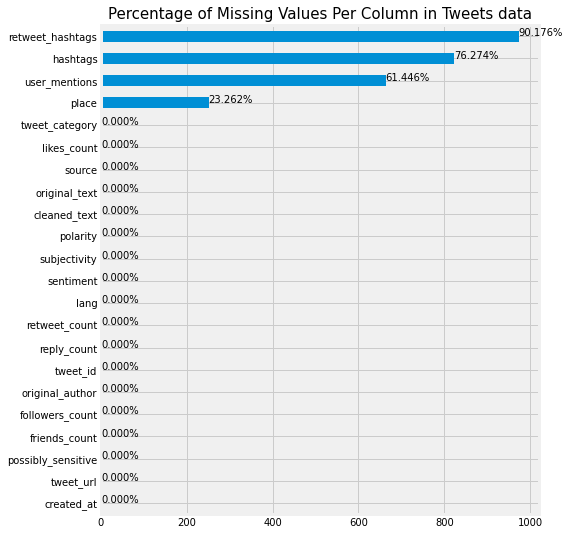

In [24]:
# Check the percentage of missing values in every column
ax = df_tweet.isna().sum().sort_values().plot(kind = 'barh', figsize = (7, 9))
plt.title('Percentage of Missing Values Per Column in Tweets data', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.3f}%'.format((p.get_width()/df_tweet.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

<AxesSubplot:ylabel='Place'>

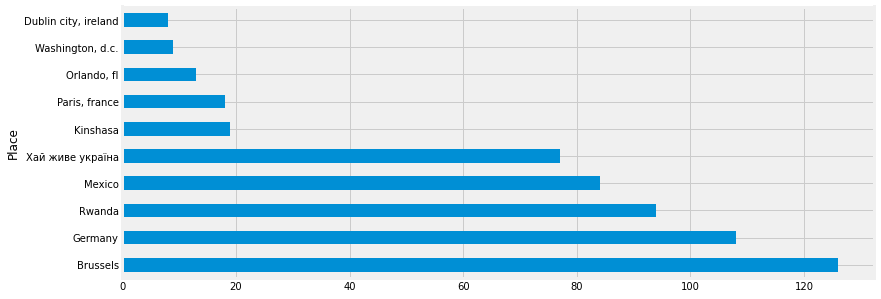

In [25]:
df_tweet['place'].value_counts(sort=True, ascending=False)[:10].plot(kind='barh',
                                                                     figsize=(12,5),xlabel='Place')

In [26]:
df_tweet_date=df_tweet.set_index('created_at')

<AxesSubplot:xlabel='Date,time'>

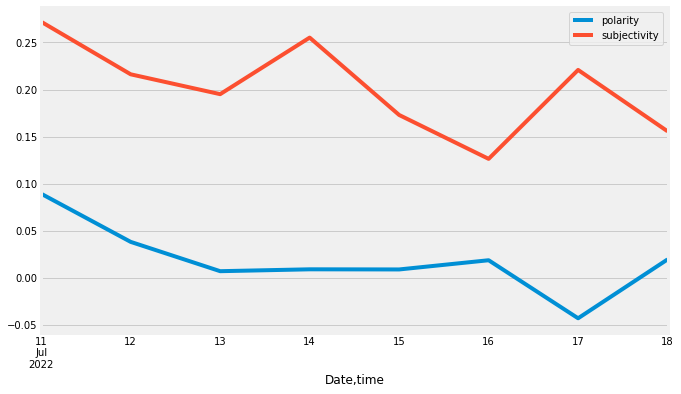

In [27]:
df_tweet_date.resample('D').mean()[['polarity','subjectivity']].dropna().plot(figsize=(10,6),xlabel='Date,time')

### uni-variate Analysis on Hashtags


In [28]:
hashtag_df=df_tweet[['original_text','hashtags','retweet_hashtags']]

In [29]:
def find_hashtags(df_tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', df_tweet)

hashtag_df['hashtag_check']=df_tweet.original_text.apply(find_hashtags)

In [30]:
hashtag_df.dropna(subset=['hashtag_check'],inplace=True)

In [31]:
tags_list=list(hashtag_df['hashtag_check'])

In [32]:
hashtags_list_df = pd.DataFrame([tag for tags_row in tags_list for tag in tags_row],columns=['hashtag'])

In [33]:
hashtags_list_df

,hashtag
0,#Dictator
1,#citation
2,#argent
3,#investissement
4,#andusia
...,...
480,#talks
481,#RDF
482,#Majorit
483,#RDF


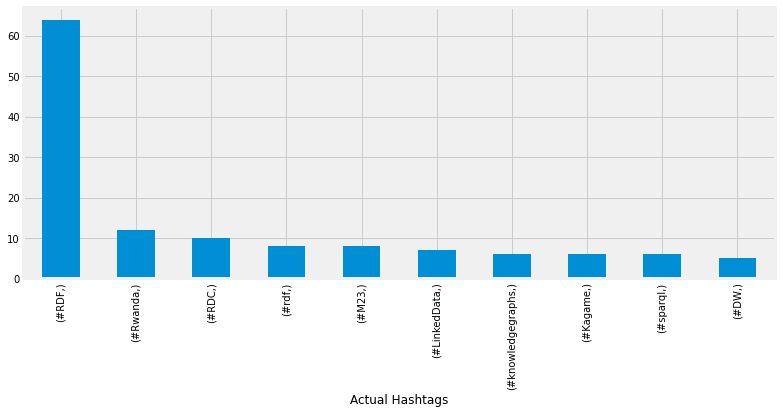

In [34]:
_=hashtags_list_df.value_counts()[:10].plot(kind='bar',figsize=(12,5),xlabel='Actual Hashtags')

In [35]:
#Convert hastags to lowercase
hashtags_list_df['hashtag'] = hashtags_list_df['hashtag'].str.lower()

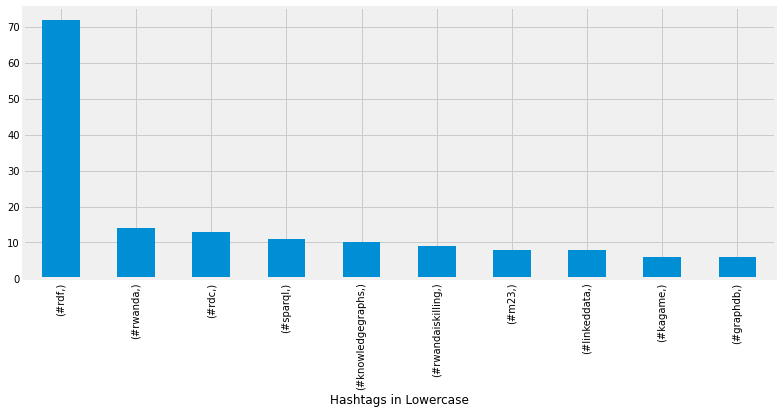

In [36]:
_=hashtags_list_df.value_counts()[:10].plot(kind='bar',figsize=(12,5),xlabel='Hashtags in Lowercase')

In [37]:
user_summary=df_tweet.groupby('original_author').agg({'cleaned_text':'count','followers_count':'max',
                                         'polarity':'mean','subjectivity':'mean', 'sentiment':pd.Series.mode})

In [38]:
user_summary.sort_values(by='cleaned_text',ascending=False).head(10)

,cleaned_text,followers_count,polarity,subjectivity,sentiment
original_author,,,,,
EUwatchers,119,25730,-0.054550,0.218267,Neutral
123_INFO_DE,106,118,0.011061,0.165068,Neutral
Noticieros_MEX,84,4915,-0.035106,0.227981,Neutral
rogue_corq,77,1834,-0.029494,0.226391,Neutral
EtudesRwanda,33,500,0.000000,0.000000,Positive
bouche_bee,16,2836,0.047917,0.116667,Neutral
SMARFreedom,15,2390,-0.017273,0.166970,Neutral
acute_tomato,14,17388,-0.036905,0.198810,Neutral
PhotoFinishBot,13,131,0.017486,0.577119,Neutral


Sentiment summary of the tweets

In [39]:
text_grouped = df_tweet.groupby('sentiment').count()['cleaned_text'].reset_index()

In [40]:
text_grouped

,sentiment,cleaned_text
0,Negative,228
1,Neutral,514
2,Positive,337


<AxesSubplot:xlabel='sentiment', ylabel='count'>

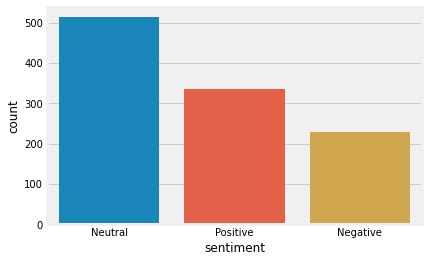

In [41]:
sns.countplot(x='sentiment', data=df_tweet)

**Most frequent words in our tweets dataset**

In [42]:
english_tweets=cleaner.remove_other_languages_tweets(df_tweet)

In [43]:
# text Preprocessing
english_tweets['cleaned_text'] = english_tweets['cleaned_text'].str.lower()
english_tweets['cleaned_text'] = english_tweets['cleaned_text'].apply(
    lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [44]:
all_words=' '.join(english_tweets.cleaned_text.values)
wordcloud_obj=WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(all_words)

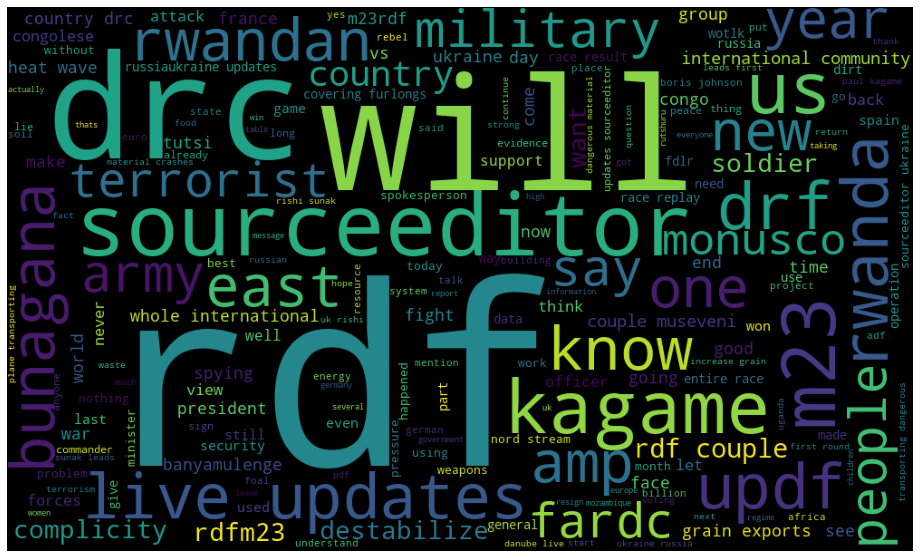

In [45]:
plt.figure(figsize=(20, 10))

fgg=plt.imshow(wordcloud_obj)
plt.axis('off')
# plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()

In [47]:
# fgg.figure.savefig('sql_dashboard/cw_rdf.png',bbox_inches='tight',pad_inches=0)

### Topic modeling

In [48]:
def preprocess_data(tweets_df):
    # Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in tweets_df['cleaned_text']]
    word_list = [sent.split() for sent in sentence_list]
    #Save only words and excludes emojis, punctuations
    word_list_new=[]
    for sent in word_list:
        word_list_new.append([re.split(r'\W+',word) for word in sent if word not in STOPWORDS and not word.isdigit()])
    
    word_list_final=[]
    for sent in word_list_new:
        word_list_final.append([i[0] for i in sent])
    # Create dictionary which contains Id and word 
    word_to_id = corpora.Dictionary(word_list_final)
    corpus_1 = [word_to_id.doc2bow(tweet) for tweet in word_list_final]

    return word_list_final, word_to_id, corpus_1

In [49]:
word_list, id2word, corpus=preprocess_data(english_tweets)

In [50]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=False)

In [51]:
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('', 0.04146376),
   ('rdf', 0.0413341),
   ('m23', 0.015439376),
   ('army', 0.008385332),
   ('amp', 0.007938846),
   ('race', 0.0068484056),
   ('people', 0.0062910374),
   ('war', 0.0060261507),
   ('years', 0.0057954057),
   ('fight', 0.005137399)]),
 (1,
  [('', 0.036761362),
   ('ukraine', 0.034051456),
   ('sourceeditor', 0.024734296),
   ('russia', 0.01891884),
   ('live', 0.017954951),
   ('updates', 0.017340692),
   ('grain', 0.013675931),
   ('exports', 0.011482365),
   ('president', 0.011018839),
   ('security', 0.008957162)]),
 (2,
  [('rdf', 0.04471484),
   ('will', 0.016055545),
   ('know', 0.010011773),
   ('', 0.007778299),
   ('using', 0.006385545),
   ('time', 0.0057587926),
   ('officers', 0.0052704294),
   ('one', 0.0046804813),
   ('anyone', 0.0046575423),
   ('use', 0.004606543)]),
 (3,
  [('drc', 0.021912195),
   ('rdf', 0.021652285),
   ('kagame', 0.016826453),
   ('rwanda', 0.015208632),
   ('will', 0.012782623),
   ('country', 0.010231028),
   ('drf'

### Model Analysis

In [52]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# doc_lda = lda_model[corpus]

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)


Perplexity:  -8.057546973788469

 Ldamodel Coherence Score/Accuracy on Tweets:  0.44080684287909316


**Model 1 words with some digits, 5 topics**

Perplexity:  -9.857909007134007\
Ldamodel Coherence Score/Accuracy on Tweets:  0.4242327533406264

**Model 2 words without digits, 5 topics**

Perplexity:  -9.82031321033761\
Ldamodel Coherence Score/Accuracy on Tweets:  0.4368570452021986

In [53]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.021912  0.232637       1        1  24.806452
3      0.162037 -0.131325       2        1  22.051246
2      0.072917  0.011035       3        1  21.262425
1     -0.241140 -0.060379       4        1  17.720104
4     -0.015727 -0.051967       5        1  14.159772, topic_info=              Term        Freq       Total Category  logprob  loglift
19                  231.000000  231.000000  Default  30.0000  30.0000
1275       ukraine   76.000000   76.000000  Default  29.0000  29.0000
6     sourceeditor   77.000000   77.000000  Default  28.0000  28.0000
24             drc   61.000000   61.000000  Default  27.0000  27.0000
56             rdf  324.000000  324.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
498         really    6.607455    7.266913   Topic5  -5.5910   1.8596
6     sourceeditor   22.322146   77.597545   Topic5  -4.3736   0.7088
56             rdf   17.951259  324.933391   Topic5  -4.5915  -0.9412
339             uk    8.476377   21.278179   Topic5  -5.3419   1.0344
704            war    7.862996   27.012536   Topic5  -5.4170   0.7206

[224 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
19        1  0.558203           
19        3  0.090870           
19        4  0.350499           
604       1  0.949475   actually
1647      1  0.929221        adf
...     ...       ...        ...
598       1  0.596392      world
598       4  0.379522      world
78        1  0.968339      years
624       1  0.944376        yes
2268      4  0.923234  zelenskyy

[214 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2, 5])

###  END

**Number of Topics optimatization**

As we can see the coherence accuracy increases with number of topics which is expected but again \
many topics again would lead to meaningless conclusion. Let's use elbow method to find optimum number of topics

In [53]:
# # Find best LDA Model considering different number of topics

# params_dic={'topics_number':[],'coherence':[],'perplexity':[]}
# for top_number in range(1,10):
#     lda_model = gensim.models.ldamodel.LdaModel(corpus,
#                                             id2word=id2word,
#                                             num_topics=top_number, 
#                                             random_state=100,
#                                             update_every=1,
#                                             chunksize=100,
#                                             passes=10,
#                                             alpha='auto',
#                                             per_word_topics=False)
    
#     perplexity=lda_model.log_perplexity(corpus)  
#     # Compute Coherence Score
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
#     coherence_lda = coherence_model_lda.get_coherence()
#     params_dic['topics_number'].append(top_number)
#     params_dic['coherence'].append(coherence_lda)
#     params_dic['perplexity'].append(perplexity)

In [54]:
# pd.DataFrame(params_dic).plot(y=['coherence'])
# # pd.read_csv("elbow_metrics.csv",index_col=0).plot(y=['coherence'])

In [ ]:
# import numpy as np

In [ ]:
# alphas = list(np.arange(0.01, 3, 0.1))
# alphas.append('symmetric')
# alphas.append('asymmetric')
# alphas.append('auto')

In [ ]:
# # Find best LDA Model considering different number of alpha

# params_dic_alpha={'alpha':[],'coherence':[],'perplexity':[]}
# for alpha in alphas:
#     lda_model = gensim.models.ldamodel.LdaModel(corpus,
#                                             id2word=id2word,
#                                             num_topics=7, 
#                                             random_state=100,
#                                             update_every=1,
#                                             chunksize=100,
#                                             passes=10,
#                                             alpha=alpha,
#                                             per_word_topics=False)
    
#     perplexity=lda_model.log_perplexity(corpus)  
#     # Compute Coherence Score
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
#     coherence_lda = coherence_model_lda.get_coherence()
#     params_dic_alpha['alpha'].append(alpha)
#     params_dic_alpha['coherence'].append(coherence_lda)
#     params_dic_alpha['perplexity'].append(perplexity)

In [ ]:
# pd.DataFrame(params_dic_alpha).plot(y='coherence')#.sort_values('coherence',ascending=False)

**Model with selected optimum parameters**

In [ ]:
# # Build LDA model
# lda_model = gensim.models.ldamodel.LdaModel(corpus,
#                                            id2word=id2word,
#                                            num_topics=7, 
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=0.1,
#                                            per_word_topics=False)

In [ ]:
# pprint(lda_model.show_topics(formatted=False))

In [ ]:
# # Compute Perplexity
# #It's a measure of how good the model is. The lower the better. Perplexity is a negative value
# print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# # doc_lda = lda_model[corpus]

# # Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)

In [ ]:
# # Visualize the topics
# pyLDAvis.enable_notebook()

# LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
# LDAvis_prepared